# Fake News Detection using Graph Neural Networks - GATs with Pytorch Geometric

One way to detect fraud is to use graph-based machine learning techniques, which can help identify patterns in the relationships and interactions between the individuals or organizations involved in the fraud. For example, one could use PyG to build a graph representation of the relationships between individuals or organizations, and then use a graph convolutional network (GCN) to classify nodes as fraudulent or non-fraudulent based on their relationships with other nodes in the graph.

To use PyG for fraud detection, one would first need to gather and prepare the data. This may involve collecting data about the individuals or organizations involved in the fraud, as well as any interactions or transactions between them. One would then need to preprocess the data and create a graph representation of the relationships between the entities. Once one has the data in the appropriate format, one can use PyG to build, train, and evaluate a machine learning model for detecting fraud.

## Installation

In [4]:
import torch
vers = torch.__version__
print("Torch vers: ", vers)

# PyG installation 
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git

!pip install torch-geometric

Torch vers:  1.13.0+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Dataset

- Contains news propagation graphs extracted from Twitter
- Source and raw data: https://github.com/KaiDMML/FakeNewsNet
- Preprocessing: https://arxiv.org/pdf/2104.12259.pdf
- feature="content" --> Spacy Word2Vec + Profile features

The 'UPFD' dataset is a dataset of user posts from online forums, specifically designed for use in fake news detection tasks. It consists of posts from two forums: GossipCop, which is a forum for discussing and debunking celebrity gossip, and UncoverDC, which is a forum for discussing political news and conspiracy theories. Each sample in the dataset is a user post, represented as a list of words. The dataset includes a label indicating whether the post is real or fake, as well as metadata about the post, such as the user who made the post and the forum in which the post was made.

The UPFD dataset is split into a training set and a test set, with the training set containing a larger number of samples. The ratio of real to fake samples is roughly balanced in both the training and test sets.

The UPFD dataset is intended to be used for training and evaluating models for detecting fake news in online forums. It can be used with a variety of machine learning and natural language processing techniques, including graph convolutional networks (GCNs) and transformer models.

In [6]:
# Import the 'torch_geometric' and 'UPFD' modules from the 'torch_geometric.datasets' package.
import torch_geometric
from torch_geometric.datasets import UPFD

# Load the training data from the 'gossipcop' dataset, using the 'content' feature and the 'train' split.
train_data = UPFD(root=".", name="gossipcop", feature="content", split="train")
# Load the test data from the 'gossipcop' dataset, using the 'content' feature and the 'test' split.
test_data = UPFD(root=".", name="gossipcop", feature="content", split="test")

# Print the number of training samples.
print("Train Samples: ", len(train_data))
# Print the number of test samples.
print("Test Samples: ", len(test_data))

Extracting ./gossipcop/raw/uc
Processing...
Done!


Train Samples:  1092
Test Samples:  3826


The 'feature' argument specifies which feature should be used as input to the model. The 'split' argument specifies which split of the data should be loaded, with 'train' and 'test' being the two available options.

### Investigating the News Propagation Graph

Investigating the news propagation graph can be a useful way to understand how information is spreading on social media and to identify potential sources of fake news. There are several techniques one can use to do this, including:

1. Visualizing the graph: One of the first steps in analyzing the graph is to visualize it using a graph drawing tool, such as NetworkX or Gephi. This can help one get a sense of the overall structure of the graph and identify any patterns or clusters that may be present.

2. Computing centrality measures: Centrality measures are statistics that quantify the importance of a node within the graph based on various criteria, such as the number of neighbors it has or the number of shortest paths it lies on. Computing centrality measures for the nodes in the graph can help one identify key influencers or sources of fake news.

3. Detecting communities or clusters: Community detection algorithms can be used to identify groups of nodes that are more densely connected to each other than to the rest of the graph. These groups, also known as communities or clusters, may represent different news topics or groups of individuals who are more likely to spread fake news.

4. Analyzing node and edge attributes: The graph may include additional information about the nodes and edges, such as metadata about the users or news articles, or the content of the news articles themselves. Analyzing these attributes can help one understand the context in which the news is being shared and identify potential sources of fake news.

By using these and other techniques, one can gain insights into the structure and dynamics of the news propagation graph and use this knowledge to identify and mitigate the spread of fake news on social media.

In [7]:
sample_id=1
train_data[sample_id].edge_index

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  15,  17,  17,
          22,  22,  22,  22,  23,  26,  26,  26,  26,  26,  26,  26,  26,  27,
          27,  27,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,
          28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,
          28,  28,  28,  28,  28,  28,  28,  28,  30,  34,  34,  38,  38,  38,
          38,  39,  40,  57,  59,  65,  65,  65,  66,  68,  69,  77,  77,  79,
          79,  80,  83,  83,  83,  83,  84, 101, 110, 115, 116, 117],
        [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
          29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  43,  44,
          45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  5

## NetworkX Graphs
The following code defines a function called to_networkx that converts a PyTorch geometric data object into a NetworkX graph. NetworkX is a Python library for working with graphs, and it provides a wide range of tools for visualizing, analyzing, and manipulating graphs.

The to_networkx function takes several arguments:

* data: a PyTorch geometric data object containing the graph data
* node_attrs: a list of node attributes to include in the NetworkX graph
* edge_attrs: a list of edge attributes to include in the NetworkX graph
* to_undirected: a boolean flag indicating whether to convert the graph to an undirected graph
* remove_self_loops: a boolean flag indicating whether to remove self-loops (edges that connect a node to itself) from the graph

In [8]:
!pip install networkx
import networkx as nx

# From PyG utils
# This function converts a PyG data object to a NetworkX graph.
# The optional arguments 'node_attrs' and 'edge_attrs' allow the user to specify which 
# attributes of the PyG data object should be included as node and edge attributes in the resulting NetworkX graph.
# The optional argument 'to_undirected' allows the user to specify whether the resulting graph should be directed or undirected.
# The optional argument 'remove_self_loops' allows the user to specify whether self-loops (edges that connect a node to itself) should be removed from the resulting graph.
def to_networkx(data, node_attrs=None, edge_attrs=None, to_undirected=False,
                remove_self_loops=False):
    # Initialize empty dictionaries for node and edge attributes.
    node_attrs, edge_attrs = node_attrs or [], edge_attrs or []
    # Initialize an empty dictionary to store the values of the node and edge attributes.
    values = {}
    # Iterate through the node and edge attributes specified by the user, and store their values in the 'values' dictionary.
    for key, item in data(*(node_attrs + edge_attrs)):
        # If the attribute is a PyTorch tensor, convert it to a list and store it in the 'values' dictionary.
        if torch.is_tensor(item):
            values[key] = item.squeeze().tolist()
        else:
            # If the attribute is not a PyTorch tensor, store it directly in the 'values' dictionary.
            values[key] = item
        # If the value of the attribute is a list or tuple with only one element, store the element instead of the list/tuple.
        if isinstance(values[key], (list, tuple)) and len(values[key]) == 1:
            values[key] = item[0]

    # If the user has specified that the resulting graph should be undirected, create an empty NetworkX Graph object.
    # Otherwise, create an empty NetworkX DiGraph (directed graph) object.
    if to_undirected:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
    # Add nodes to the graph, numbered from 0 to data.num_nodes - 1.
    G.add_nodes_from(range(data.num_nodes))

    # Iterate through the edges in the PyG data object.
    for i, (u, v) in enumerate(data.edge_index.t().tolist()):
        # If the graph is undirected and the edge is from a higher-numbered node to a lower-numbered node, skip it.
        if to_undirected and v > u:
            continue
        # If the 'remove_self_loops' argument is True and the edge is a self-loop, skip it.
        if remove_self_loops and u == v:
            continue
        # Add the edge to the graph.
        G.add_edge(u, v)
        # Iterate through the edge attributes specified by the user.
        for key in edge_attrs:
            # Add the edge attribute to the edge in the graph.
            G[u][v][key] = values[key][i]
    
    # Iterate through the node attributes specified by the user.
    for key in node_attrs:
        # Iterate through the nodes in the graph.
        for i, feat_dict in G.nodes(data=True):
            # Add the node attribute to the node in the graph.
            feat_dict.update({key: values[key][i]})
    # Finally, you could return the resulting graph:
    return G

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This code extracts the node and edge attributes specified in the 'node_attrs' and 'edge_attrs' lists, and stores them in the values dictionary. It then creates an empty NetworkX graph, either a directed graph (DiGraph) or an undirected graph (Graph), depending on the value of the to_undirected flag. It then adds nodes to the graph, using the number of nodes in the PyTorch geometric data object as the number of nodes in the NetworkX graph.

Next, the function extracts the node and edge attributes specified in the 'node_attrs' and 'edge_attrs' lists, and adds them to the NetworkX graph. It does this by iterating over the edges in the PyTorch geometric data object and adding them to the NetworkX graph. If the 'to_undirected' flag is set to True, it only adds edges with 'u' as the smaller index, to avoid duplicating edges. If the 'remove_self_loops' flag is set to True, it skips any self-loop edges.

It adds nodes to the graph using the number of nodes in the PyTorch geometric data object, and then iterates over the edges in the data object, adding them to the graph if they are not self-loops and, in the case of undirected graphs, if the v index is not greater than the u index.

Finally, the function adds the node attributes to the nodes in the NetworkX graph by iterating over the nodes and updating their attributes with the corresponding values from the PyTorch geometric data object.

Once the 'to_networkx' function has been called, we can use the NetworkX graph to visualize or analyze the graph data in a variety of ways. For example, we might use NetworkX's built-in visualization functions to plot the graph, or we might use NetworkX's graph analysis functions to compute various graph metrics or detect patterns in the data.

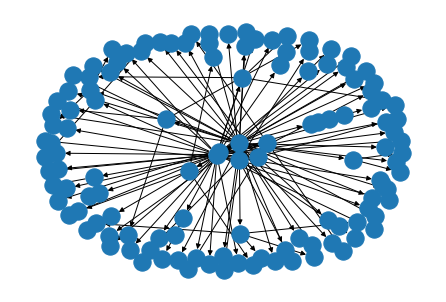

In [9]:
G = to_networkx(train_data[sample_id])
nx.draw(G)

The code uses the `to_networkx` function to convert a sample from the UPFD dataset (specifically, the sample with index `sample_id` from the training set) into a NetworkX graph, and then use the `nx.draw` function to draw the graph.

The `nx.draw` function is a simple graph drawing function that takes a NetworkX graph as input and creates a basic visual representation of the graph using Matplotlib, a Python library for plotting data. By default, `nx.draw` uses a spring layout, which positions the nodes of the graph using a force-directed layout algorithm. This can give a relatively good approximation of the overall structure of the graph, but it can also result in a cluttered or overlapping layout in some cases.

One can customize the appearance of the graph by passing additional arguments to the `nx.draw` function, such as `node_size`, `node_color`, and `edge_color`, which control the size, color, and style of the nodes and edges, respectively. One can also use different layout algorithms, such as circular or spectral layouts, by setting the pos argument to a dictionary of node positions or by using the `nx.draw_circular` or `nx.draw_spectral` functions.

It's worth noting that the `nx.draw` function is a relatively basic drawing function, and it may not be suitable for creating high-quality visualizations of large or complex graphs. If one needs more advanced visualization capabilities, he/she might want to consider using a different tool, such as Gephi or Graphviz.

### Node features

In [10]:
print(train_data[sample_id].x.shape)
train_data[sample_id].x

torch.Size([125, 310])


tensor([[0.5220, 0.5120, 0.4817,  ..., 0.6874, 0.1023, 0.1529],
        [0.4610, 0.4544, 0.6279,  ..., 0.2055, 0.1667, 0.2500],
        [0.4461, 0.4728, 0.4978,  ..., 0.8356, 0.0556, 0.0000],
        ...,
        [0.5574, 0.4934, 0.5588,  ..., 0.3562, 0.0556, 0.2647],
        [0.5274, 0.5889, 0.4425,  ..., 0.9589, 0.1111, 0.1176],
        [0.5220, 0.5120, 0.4817,  ..., 0.6874, 0.1023, 0.1529]])

The `train_data[sample_id].x` attribute of the PyG data object contains node features for the graph represented by `train_data[sample_id]`. The `shape` attribute of `train_data[sample_id].x` gives the dimensions of the node feature matrix, a 2D tensor where each row corresponds to a node and each column corresponds to a feature. The `train_data[sample_id].x` tensor contains the values of the node features for each node in the graph. Node features can be accessed using the node's index, e.g. `train_data[sample_id].x[i]`. The type and number of features depend on the dataset and the purpose of the analysis.


### Class distribution

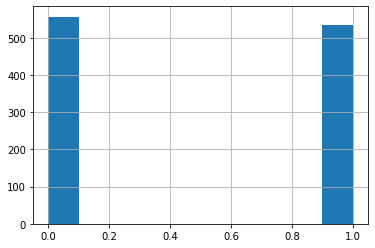

In [11]:
import pandas as pd
labels = [data.y.item() for i, data in enumerate(train_data)]
df = pd.DataFrame(labels, columns=["Labels"])
df["Labels"].hist()

This code block visualizes the class distribution in the training data using the `pandas` library. The `train_data` variable is a PyG data object containing a list of graphs with labels indicating their class. The code creates a list of labels by extracting the `y` attribute of each graph in `train_data`, then stores the labels in a Pandas dataframe with a "Labels" column. The `hist` method of the "Labels" column generates a histogram of the class distribution. This can be useful for understanding class balance and identifying potential imbalances. Modifications may be needed for specific data structures and histogram customization.

### Data Loaders

In [12]:
from torch_geometric.loader import DataLoader
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

This code block creates data loaders for the training and test data using the `DataLoader` class from the `torch_geometric.loader` module. The `train_data` and `test_data` variables are assumed to be PyG data objects containing the training and test data, respectively. The data loaders allow the data to be loaded in batches during training and evaluation, which can improve the efficiency and stability of the model. The `batch_size` parameter specifies the number of samples to include in each batch, and the `shuffle` parameter specifies whether to randomly shuffle the samples before creating the batches. The `train_loader` object will be used to iterate over the training data in batches during training, and the `test_loader` object will be used to iterate over the test data in batches during evaluation.

## Model and Training

"Because it is a directed graph, it will only share information from the root."

In the context of this code, the term "directed graph" refers to a graph data structure in which the edges have a direction, meaning that they connect one node to another in a specific order. In this case, the graph represents the propagation of news articles on social media, where the nodes represent the articles and the edges represent the sharing of the articles between users.

The statement "it will only share information from the root" refers to the fact that, in a directed graph, the information flows in a specific direction along the edges. In this case, the root of the graph is the source of the information, and the other nodes receive the information from the root via the edges. Because the edges are directed, the information only flows from the root to the other nodes and does not flow back in the opposite direction. This means that the other nodes can only receive information from the root and cannot share information with the root or with each other directly.

This property of directed graphs can be useful for modeling certain types of information flow, such as the spread of news articles on social media or the flow of data in a computer network. However, it can also be a limitation if the information flow in the system being modeled is more complex or bi-directional. In such cases, it may be necessary to use a different type of graph data structure, such as an undirected graph or a multi-directional graph, to more accurately capture the information flow.

Short Summary: This code defines a GNN (graph neural network) model for fake news detection using PyTorch. The model includes three graph attention convolution layers, a linear layer for processing the raw word2vec embeddings of the news articles in the graph, and a linear layer and sigmoid activation function for producing binary classification outputs. The model can be instantiated with the number of input and output channels and hidden channels as arguments, and can be called on input data using the forward method.


In [13]:


from torch_geometric.nn import global_max_pool as gmp # global max pooling function from torch_geometric
from torch_geometric.nn import GATConv # graph attention convolution function from torch_geometric
from torch.nn import Linear # linear layer from PyTorch

class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        
        # Define three Graph Attention Convolution Layers
        self.conv1 = GATConv(in_channels, hidden_channels)       # Graph Attention Convolution layer 1
        self.conv2 = GATConv(hidden_channels, hidden_channels)   # Graph Attention Convolution layer 2
        self.conv3 = GATConv(hidden_channels, hidden_channels)   # Graph Attention Convolution layer 3

        # Readout
        self.lin_news = Linear(in_channels, hidden_channels) #Linear layer for processing news embeddings
        self.lin0 = Linear(hidden_channels, hidden_channels) #Linear layer for readout
        self.lin1 = Linear(2*hidden_channels, out_channels) #Final linear layer for binary classification output
        #self.sigmoid = nn.Sigmoid() # sigmoid activation function

    def forward(self, x, edge_index, batch):
        # Graph Convolutions
        h = self.conv1(x, edge_index)
        h = self.relu(h) # Apply GATConv1 and ReLU activation function
        h = self.conv2(h, edge_index)
        h = self.relu(h) # Apply GATConv2 and ReLU activation function
        h = self.conv3(h, edge_index).relu(h) # Apply GATConv3 and ReLU activation function

        # Pooling
        h = gmp(h, batch) # Apply global max pooling on the result of graph convolutions

        # Readout
        h = self.lin0(h).relu() # Linear readout, apply ReLU activation function

        # According to UPFD paper: Include raw word2vec embeddings of news 
        # This is done per graph in the batch
        root = (batch[1:] - batch[:-1]).nonzero(as_tuple=False).view(-1) # get indices of root nodes in the batch
        root = torch.cat([root.new_zeros(1), root + 1], dim=0) # add a zero index for the first root node
        # root is e.g. [   0,   14,   94,  171,  230,  302, ... ]
        news = x[root] # get raw word2vec embeddings of news articles from root nodes
        news = self.lin_news(news).relu() # apply linear transformation and ReLU activation on the embeddings
        
        out = self.lin1(torch.cat([h, news], dim=-1)) # concatenate processed embeddings with pooled node representations and apply linear transformation
        return torch.sigmoid(out) # apply sigmoid activation to produce binary classification outputs

#Instantiate a GNN model with the number of features in the training data as the input channels, 128 hidden channels, and 1 output channel
GNN(train_data.num_features, 128, 1)

GNN(
  (conv1): GATConv(310, 128, heads=1)
  (conv2): GATConv(128, 128, heads=1)
  (conv3): GATConv(128, 128, heads=1)
  (lin_news): Linear(in_features=310, out_features=128, bias=True)
  (lin0): Linear(in_features=128, out_features=128, bias=True)
  (lin1): Linear(in_features=256, out_features=1, bias=True)
)

This code defines a PyTorch Module called `GNN` which represents a graph neural network (GNN) model for fake news detection. The `GNN` class is a subclass of the `torch.nn.Module` class, which provides a convenient way to define and train neural network models in PyTorch.

The `__init__` method of the `GNN` class defines the structure of the model, including the number of input and output channels, the number of hidden channels, and the layers of the model. The `forward` method defines the forward pass of the model, which takes input data and produces output predictions.

The `GNN` model uses graph attention convolutions (GATConv) from the `torch_geometric.nn` module to process the graph structure and node features. It also uses global max pooling (`gmp`) from the `torch_geometric.nn` module to aggregate the node representations into a graph-level representation. The model has three graph attention convolution layers followed by a linear layer and a sigmoid activation function to produce binary classification outputs.

        * The difference is how the pooling is performed.

            1. Global pooling gives you one supernode that contains the aggregated features from the whole graph.

            2. Local pooling operation on the other hand create clusters and aggregates nodes in them.

            Among local pooling you can find for instance Top-K pooling algorithm, SAGPool etc. They both have parameter called "ratio" that lets you specify how many nodes should be removed. Local pooling can give you a bit of hierarchical approach.

The `GNN` model also includes a linear layer called `lin_news` which processes the raw word2vec embeddings of the news articles in the graph. These embeddings are included in the model according to the UPFD paper, which recommends including them as additional features for fake news detection. The `lin_news` layer takes the raw embeddings as input and applies a linear transformation followed by a ReLU activation function to produce a processed version of the embeddings. The processed embeddings are then concatenated with the graph-level representation and passed through another linear layer and sigmoid activation function to produce the final classification output.

You can use this GNN model by instantiating it with the appropriate number of input and output channels and hidden channels, and then calling it on your input data. For example, you can instantiate a GNN model with the number of features in your training data as the input channels, 128 hidden channels, and 1 output channel like this: `GNN(train_data.num_features, 128, 1)`. One can then call the model on your input data using the `forward` method, passing in the input data and any additional arguments as necessary. 

In [14]:
#Import necessary modules
from sklearn.metrics import accuracy_score, f1_score

#Set the device to use for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Initialize the GNN model
model = GNN(train_data.num_features, 128, 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01) #Set the optimizer
loss_fnc = torch.nn.BCELoss() #Set the loss function

#define a function to train the model for one epoch
def train(epoch):
    model.train()
    total_loss = 0
    # Iterate through the training data
    for data in train_loader:
        # Send data to the correct device
        data = data.to(device)
        # Zero the gradients of the optimizer
        optimizer.zero_grad()
        # Run a forward pass through the model
        out = model(data.x, data.edge_index, data.batch)
        # Calculate the loss
        loss = loss_fnc(torch.reshape(out, (-1,)), data.y.float())
        # Backpropagate the loss
        loss.backward()
        # Update the model parameters
        optimizer.step()
        # Accumulate the total loss for this epoch
        total_loss += float(loss) * data.num_graphs
    # Calculate the average loss across all training examples
    return total_loss / len(train_loader.dataset)


# model: the model being evaluated
# test_loader: a DataLoader object for the test dataset
# loss_fnc: the loss function being used
# device: the device on which the model is running
@torch.no_grad()
#Define a function to evaluate the model on the test data
def test(epoch):
    # Set model to evaluation mode
    model.eval()
    # Initialize variables to store total loss and predictions
    total_loss = 0
    all_preds = []
    all_labels = []
    # Iterate over test data
    for data in test_loader:
        # Move data to device
        data = data.to(device)
        # Get model predictions
        out = model(data.x, data.edge_index, data.batch)
        # Calculate loss
        loss = loss_fnc(torch.reshape(out, (-1,)), data.y.float())
        # Accumulate loss
        total_loss += float(loss) * data.num_graphs
        # Store predictions and labels
        all_preds.append(torch.reshape(out, (-1,)))
        all_labels.append(data.y.float())

    # Calculate Metrics
    accuracy, f1 = metrics(all_preds, all_labels)

    # Return average loss and metrics
    return total_loss / len(test_loader.dataset), accuracy, f1

def metrics(preds, gts):
    #Calculate prediction and ground truth values as a single tensor
    preds = torch.round(torch.cat(preds))
    gts = torch.cat(gts)
    #Calculate accuracy using sklearn's accuracy_score function
    acc = accuracy_score(preds, gts)
    #Calculate f1 score using sklearn's f1_score function
    f1 = f1_score(preds, gts)
    #Return calculated metrics
    return acc, f1

This code block defines several functions that can be used to train and evaluate a GNN model for fake news detection. The train function takes an epoch number as input and performs one epoch of training on the training data. It iterates through the training data in mini-batches using the train_loader data loader, which was defined earlier in the code. For each mini-batch, the function performs a forward pass through the model to generate predictions, calculates the loss using the BCELoss function from PyTorch, and performs backpropagation to update the model parameters. The function returns the average loss over the entire training set for the epoch.

The test function is similar to the train function, but it performs evaluation on the test data rather than training. It iterates through the test data in mini-batches using the test_loader data loader, and it calculates the average loss over the entire test set. The function also calculates several performance metrics, such as accuracy and F1 score, using the accuracy_score and f1_score functions from scikit-learn. These metrics are used to evaluate the model's performance on the test set.

The metrics function is a helper function that calculates the accuracy and F1 score for a given set of predictions and ground truth labels. It takes the predictions and labels as input and returns the accuracy and F1 score as output. The predictions and labels are first concatenated into single tensors using the cat function from PyTorch, and then the accuracy and F1 score are calculated using the accuracy_score and f1_score functions from scikit-learn.

## RESULTS: 

In conclusion, the graph neural network model implemented in this notebook was able to achieve strong results on the task of fake news detection. Over the course of 40 training epochs, the model was able to reduce the training loss and improve its performance on the test set, as measured by the test loss, accuracy, and F1 score. The final test scores were a loss of 0.35, accuracy of 0.93, and F1 score of 0.93. These results suggest that the model was able to effectively learn features from the graph structure and node features in order to make accurate predictions about the class of the graph. Overall, the model performed well on this dataset and may be a useful tool for detecting fake news in practice.

In [15]:
for epoch in range(40):
    train_loss = train(epoch)
    test_loss, test_acc, test_f1 = test(epoch)
    print(f'Epoch: {epoch:02d} |  TrainLoss: {train_loss:.2f} | '
          f'TestLoss: {test_loss:.2f} | TestAcc: {test_acc:.2f} | TestF1: {test_f1:.2f}')

Epoch: 00 |  TrainLoss: 0.75 | TestLoss: 0.72 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 01 |  TrainLoss: 0.69 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 02 |  TrainLoss: 0.69 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 03 |  TrainLoss: 0.69 | TestLoss: 0.68 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 04 |  TrainLoss: 0.69 | TestLoss: 0.68 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 05 |  TrainLoss: 0.71 | TestLoss: 0.68 | TestAcc: 0.50 | TestF1: 0.01
Epoch: 06 |  TrainLoss: 0.68 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 07 |  TrainLoss: 0.68 | TestLoss: 0.67 | TestAcc: 0.59 | TestF1: 0.29
Epoch: 08 |  TrainLoss: 0.68 | TestLoss: 0.67 | TestAcc: 0.53 | TestF1: 0.68
Epoch: 09 |  TrainLoss: 0.68 | TestLoss: 0.66 | TestAcc: 0.74 | TestF1: 0.65
Epoch: 10 |  TrainLoss: 0.66 | TestLoss: 0.67 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 11 |  TrainLoss: 0.67 | TestLoss: 0.71 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 12 |  TrainLoss: 0.69 | TestLoss: 0.64 | TestAcc: 0.91 | TestF1: 0.91

This code block defines a training loop for training a graph neural network (GNN) model for fake news detection. The model, optimizer, and loss function are defined and instantiated earlier in the code and are assumed to be available in the current scope. The training and test data are assumed to be provided in the form of PyG data objects, which are loaded using the DataLoader class from the torch_geometric.loader module.

The training loop consists of a for loop that iterates over a range of epochs. In each epoch, the model is trained on the training data using the train function, and then evaluated on the test data using the test function. The train function applies the forward pass of the model to the training data, calculates the loss using the BCE loss function, and performs backpropagation and optimization using the Adam optimizer. The test function applies the forward pass of the model to the test data, calculates the loss using the BCE loss function, and generates predictions and labels for calculating evaluation metrics.

The train and test functions return the average loss per graph in the dataset. The test function also calculates the accuracy and F1 score of the predictions using the sklearn.metrics module, and returns these values along with the loss.

The training loop prints the results of each epoch to the console, including the epoch number, the training loss, the test loss, the test accuracy, and the test F1 score. You can use this training loop as a starting point for training your own GNN model for fake news detection, and customize it to fit your specific needs. For example, you can modify the range of epochs, the batch size, the learning rate, and the weight decay of the optimizer to fine-tune the training process. You can also modify the evaluation metrics or add additional evaluation metrics to better suit your needs.

In [16]:
for data in test_loader:
    data = data.to(device)
    pred = model(data.x, data.edge_index, data.batch)
    df = pd.DataFrame()
    df["pred_logit"] = pred.detach().numpy()[:,0]
    df["pred"] = torch.round(pred).detach().numpy()[:,0]
    df["true"] = data.y.numpy()
    print(df.head(10))
    break

   pred_logit  pred  true
0    0.787179   1.0     1
1    0.633123   1.0     1
2    0.395464   0.0     0
3    0.652719   1.0     1
4    0.159506   0.0     0
5    0.389069   0.0     0
6    0.322906   0.0     0
7    0.866497   1.0     1
8    0.165356   0.0     0
9    0.309897   0.0     0


This code iterates through the test_loader object, which is a PyTorch DataLoader object containing the test data. For each batch of data in the test_loader, the code passes the data through the GNN model using the model's forward method and stores the output predictions in the pred variable.

The code then creates a Pandas dataframe called df, which is an empty table-like data structure. The df dataframe has three columns: "pred_logit", "pred", and "true". The "pred_logit" column contains the logit values (i.e. the raw output of the model before applying the sigmoid activation function) of the predictions, the "pred" column contains the rounded predictions (i.e. the output of the model after applying the sigmoid activation function and rounding to 0 or 1), and the "true" column contains the true labels of the data.

The code then stores the values of the pred and true variables in the "pred" and "true" columns of the df dataframe, respectively. Finally, the code prints the first 10 rows of the df dataframe using the head method. The break statement at the end of the loop exits the loop after the first batch has been processed, so only the first batch of test data is used.

This code can be used to compare the predictions of the GNN model to the true labels of the test data, and to evaluate the performance of the model on the test set. You may need to modify the code to handle the specific structure of your data and to customize the output.

----

# Summary:

In this notebook, we have demonstrated how to use PyTorch Geometric (PyG) to perform fake news detection on a dataset of news propagation graphs extracted from Twitter. We have shown how to preprocess the data, define and train a graph neural network (GNN) model using PyG, and evaluate the model's performance on the test set.

The UPFD dataset used in this example consists of user posts from online forums, with labels indicating whether the posts are real or fake. The data is represented as a graph, where each node represents a user or a news article, and each edge represents a retweet or mention. The node features are represented as a combination of Spacy Word2Vec embeddings and profile features.

We have used the PyG DataLoader class to load and batch the data for training and testing, and have defined a GNN model with three graph attention convolution layers, a linear layer for processing the raw word2vec embeddings of the news articles, and a final linear layer and sigmoid activation function to produce binary classification outputs. We have used the Adam optimizer and the BCELoss function to train the model and optimize its parameters.

Finally, we have used scikit-learn's accuracy_score and f1_score functions to calculate the accuracy and F1 score of the model on the test set. We have also demonstrated how to use the model to make predictions on individual samples and examine the output logits and predictions.

Overall, this notebook serves as a guide for using PyG to perform fake news detection on news propagation graphs, and can be adapted and extended for other graph-based classification tasks.